In [190]:
from __future__ import print_function
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
sys.path.append(module_path)

import numpy as np
import math
import copy
import pandas as pd
import scipy.stats as ss
import pickle
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

## Plots

In [191]:
with open("accsPart.pkl", "rb") as f:
    accsLRPart = pickle.load(f)
with open("accsAggr.pkl", "rb") as f:
    accsLRAggr = pickle.load(f)
with open("accsSingle.pkl", "rb") as f:
    accsLRSingle = pickle.load(f)

In [192]:
lrs = [2048,4096, 8192, 16384]
samples = 10
nets = 4

In [193]:
maxAccPartModel = {}
for lr in lrs:
    maxAccPartModel[lr] = []
    accs = accsLRPart[lr][0][1]
    for j in range(samples):
        maxV = np.max(accs[nets*j:nets*j+nets])
        maxAccPartModel[lr].append(maxV)

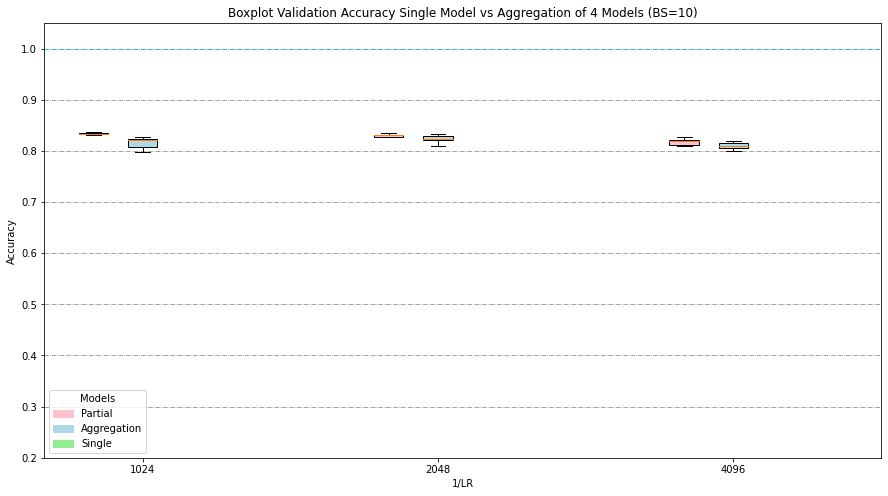

In [194]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Boxplot Validation Accuracy Single Model vs Aggregation of 4 Models (BS=10)')

accsPart = [maxAccPartModel[lr] for lr in lrs]
accsAggr = [accsLRAggr[lr][0] for lr in lrs]
# accsSingle = [accsLRSingle[lr][0][1] for lr in lrs]

part_plot = plt.boxplot(accsPart, positions=np.array(np.arange(len(accsPart)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr_plot = plt.boxplot(accsAggr, positions=np.array(np.arange(len(accsAggr)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
# single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsAggr)))*3.0+0.5, widths=0.3, 
#                           patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [198]:
np.mean(accsLRAggr[4096][0])

0.8098733333333333

In [ ]:
diff = np.subtract(accsLRSingle[2048][0][1], accsLRAggr[2048][0])
diff = round(np.mean(diff),2)

print("Mean difference Single-Aggregated models:")
print(diff)

KeyError: 2048

In [ ]:
diffLRAggrPart, diffLRSingleAggr, diffLRSinglePart  = {}, {}, {}
for lr in accsLRPart:
    diffLRAggrPart[lr] = np.subtract(accsLRAggr[lr][0], maxAccPartModel[lr])
    diffLRAggrPart[lr] = round(np.mean(diffLRAggrPart[lr]),2)

    diffLRSingleAggr[lr] = np.subtract(accsLRSingle[lr][0][1], accsLRAggr[lr][0])
    diffLRSingleAggr[lr] = round(np.mean(diffLRSingleAggr[lr]),2)

    diffLRSinglePart[lr] = np.subtract(accsLRSingle[lr][0][1], maxAccPartModel[lr])
    diffLRSinglePart[lr] = round(np.mean(diffLRSinglePart[lr]),2)

In [ ]:
print("Mean difference Aggregated-Partial models:")
print(diffLRAggrPart)
print("Mean difference Single-Aggregated models:")
print(diffLRSingleAggr)
print("Mean difference Single-Partial models:")
print(diffLRSinglePart)

Mean difference Aggregated-Partial models:
{1024: -0.65, 2048: -0.04, 4096: -0.03}
Mean difference Single-Aggregated models:
{1024: 0.65, 2048: 0.05, 4096: 0.03}
Mean difference Single-Partial models:
{1024: 0.01, 2048: 0.01, 4096: 0.0}


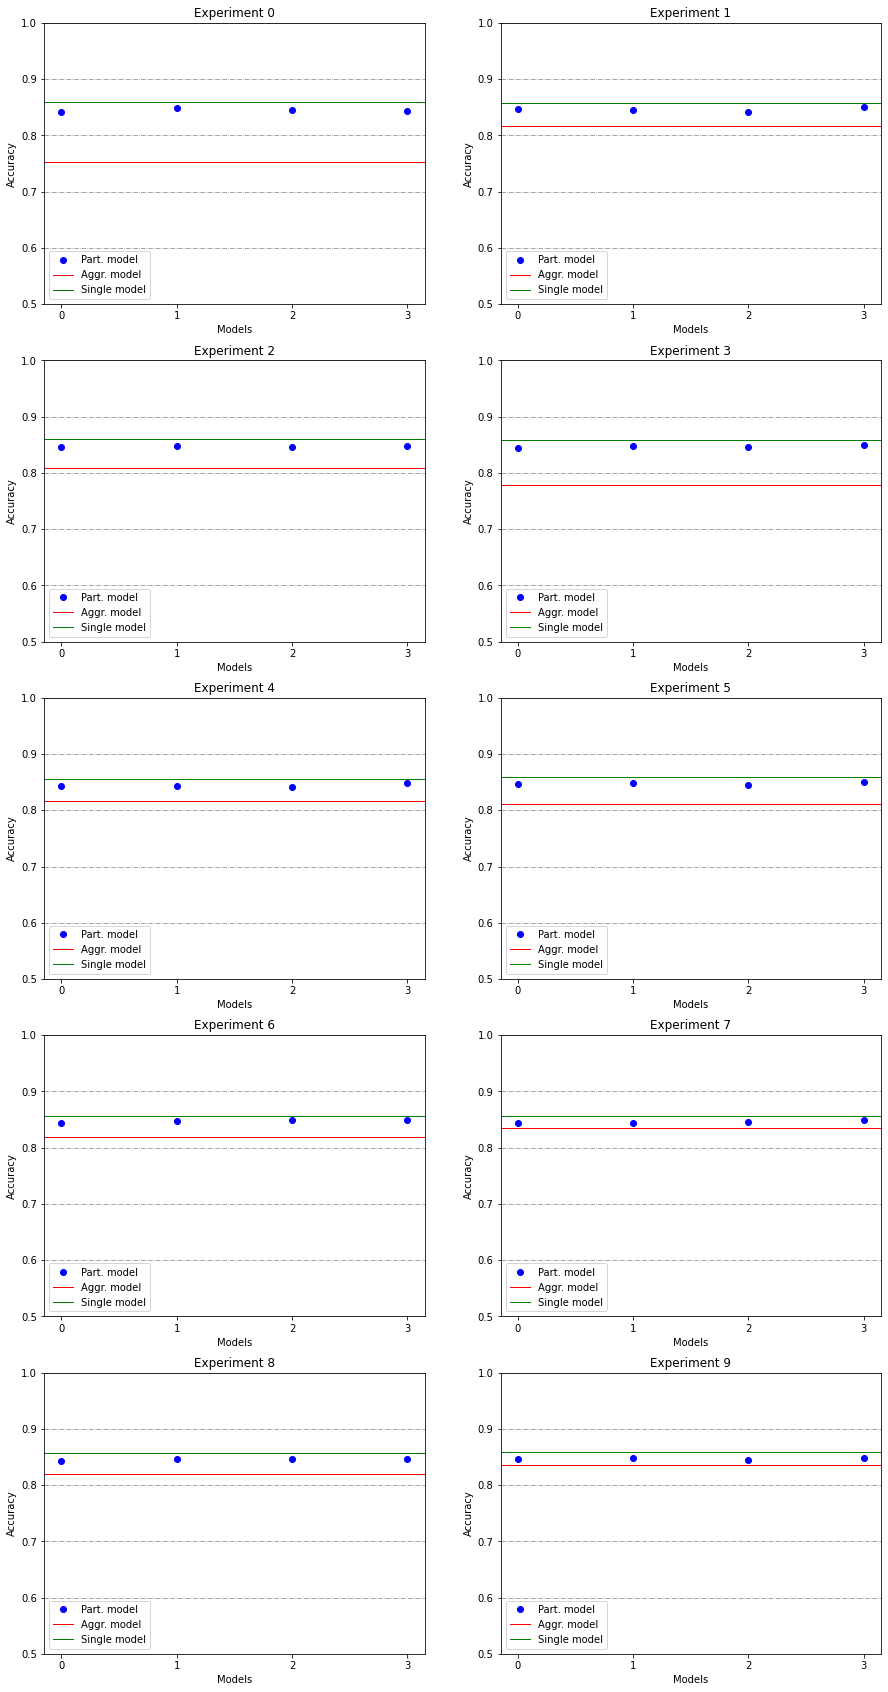

In [ ]:
fig = plt.figure(figsize=(15,30))
x_imgs,y_imgs = 5,2
axs = fig.subplots(x_imgs,y_imgs)

accsPart = [accsLRPart[2048][0][1][nets*j:nets*j+nets] for j in range(x_imgs*y_imgs)]
accsAggr = accsLRAggr[2048][0][:x_imgs*y_imgs]
accsSingle = accsLRSingle[2048][0][1][:x_imgs*y_imgs]

for i in range(x_imgs):
    for j in range(y_imgs):
        axs[i,j].set_title('Experiment ' + str(y_imgs*i+j))
        axs[i,j].plot(accsPart[y_imgs*i+j], 'bo', label='Part. model')
        axs[i,j].axhline(y = accsAggr[y_imgs*i+j], color = 'r', linewidth = 1, label='Aggr. model')
        axs[i,j].axhline(y = accsSingle[y_imgs*i+j], color = 'g', linewidth = 1, label='Single model')

for ax in axs.flat:
    ax.set(xlabel='Models', ylabel='Accuracy')
    ax.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
    ax.set_xticks([i for i in range(nets)])
    ax.set_ylim([0.5, 1])

    ax.legend(loc=3)

plt.show()